베팅 자산이 1,000원 이하로 떨어져 2023-06-15 베팅 중 중단합니다.
베팅 자산이 1,000원 이하로 떨어져 2023-06-16부터 베팅을 중단합니다.
최종 자산: 932원
총 베팅 일수: 65일
베팅 시작일: 2023-04-01
베팅 종료일: 2023-06-15
샤프 비율: -0.4092


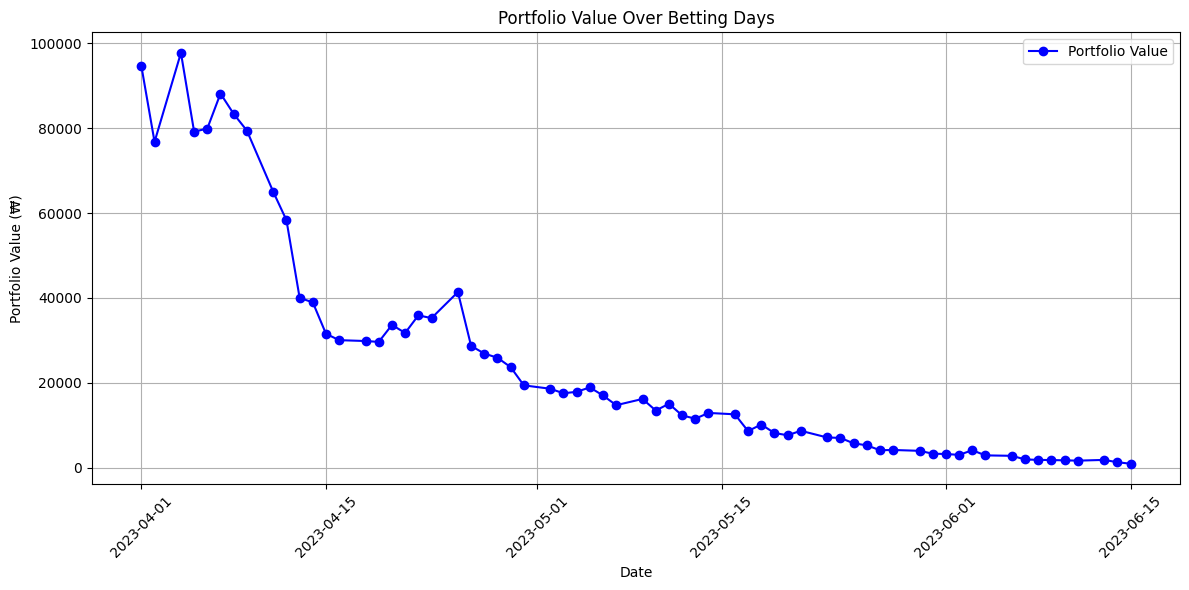

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# 파일 경로 수정
file_path = r'C:\Users\FEELab\Downloads\betman_games_수정 (1).xlsx'

# 1. 데이터 불러오기
df = pd.read_excel(file_path)

# 2. 필요한 열만 사용하고 Null 제거
df = df[['날짜', '홈', '어웨이', '홈 점수', '어웨이 점수', '홈 배당률', '어웨이 배당률']].dropna()

# 3. 날짜형으로 변환 + 정렬
df['날짜'] = pd.to_datetime(df['날짜']).dt.date
df = df.sort_values('날짜').reset_index(drop=True)

# 4. 배당률 낮은 쪽만 베팅
def choose_bet(row):
    if row['홈 배당률'] < row['어웨이 배당률']:
        return pd.Series(['홈', row['홈 배당률'], row['홈 점수'] > row['어웨이 점수']], index=['베팅팀', '배당률', '승리여부'])
    else:
        return pd.Series(['어웨이', row['어웨이 배당률'], row['어웨이 점수'] > row['홈 점수']], index=['베팅팀', '배당률', '승리여부'])

df[['베팅팀', '배당률', '승리여부']] = df.apply(choose_bet, axis=1)

# 5. 초기 자산 설정
initial_capital = 100000
capital = initial_capital
portfolio_values = [capital]  # 자산 흐름 기록 (초기 자산 포함)
dates = []                    # 베팅한 날짜 기록
daily_returns = []            # 일별 수익률 기록

# 6. 날짜별 그룹핑
grouped = df.groupby('날짜')

for date, games in grouped:
    # 자산이 1000원 이하면 베팅 중단
    if capital <= 1000:
        print(f"베팅 자산이 1,000원 이하로 떨어져 {date}부터 베팅을 중단합니다.")
        break
    
    day_profit = 0
    day_bets = 0
    
    for _, row in games.iterrows():
        # 하루 시작 시점의 자산에서 10% 베팅액 계산
        bet_amount = capital * 0.1
        
        # 자산이 베팅액보다 적으면 베팅 중단 (해당 날 더 이상 베팅 불가)
        if capital < bet_amount:
            break
        
        if row['승리여부']:
            profit = bet_amount * (row['배당률'] - 1)
        else:
            profit = -bet_amount
        
        capital += profit
        day_profit += profit
        day_bets += 1

        # 베팅 후 자산 1000원 이하면 즉시 종료
        if capital <= 1000:
            print(f"베팅 자산이 1,000원 이하로 떨어져 {date} 베팅 중 중단합니다.")
            break
    
    # 해당 날에 베팅이 있었으면 기록
    if day_bets > 0:
        dates.append(date)
        portfolio_values.append(capital)
        # daily_returns는 전일 자산 대비 오늘 수익률
        daily_returns.append(day_profit / portfolio_values[-2])

# 7. 샤프 비율 계산
returns = pd.Series(daily_returns, index=dates)
mean_return = returns.mean()
std_return = returns.std()
sharpe_ratio = mean_return / std_return if std_return != 0 else np.nan

# 8. 결과 출력
print(f"최종 자산: {capital:,.0f}원")
print(f"총 베팅 일수: {len(dates)}일")

if len(dates) > 0:
    print(f"베팅 시작일: {dates[0]}")
    print(f"베팅 종료일: {dates[-1]}")

print(f"샤프 비율: {sharpe_ratio:.4f}")
# 9. 자산 그래프 (전체 베팅 기간)
plt.figure(figsize=(12, 6))
plt.plot(dates, portfolio_values[1:], label='Portfolio Value', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (₩)')
plt.title('Portfolio Value Over Betting Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



베팅 자산이 1,000원 이하로 떨어져 2023-05-25 베팅 중 중단합니다.
베팅 자산이 1,000원 이하로 떨어져 2023-05-26부터 베팅을 중단합니다.
최종 자산: 951원
총 베팅 일수: 47일
베팅 시작일: 2023-04-01
베팅 종료일: 2023-05-25
샤프 비율: -0.3885


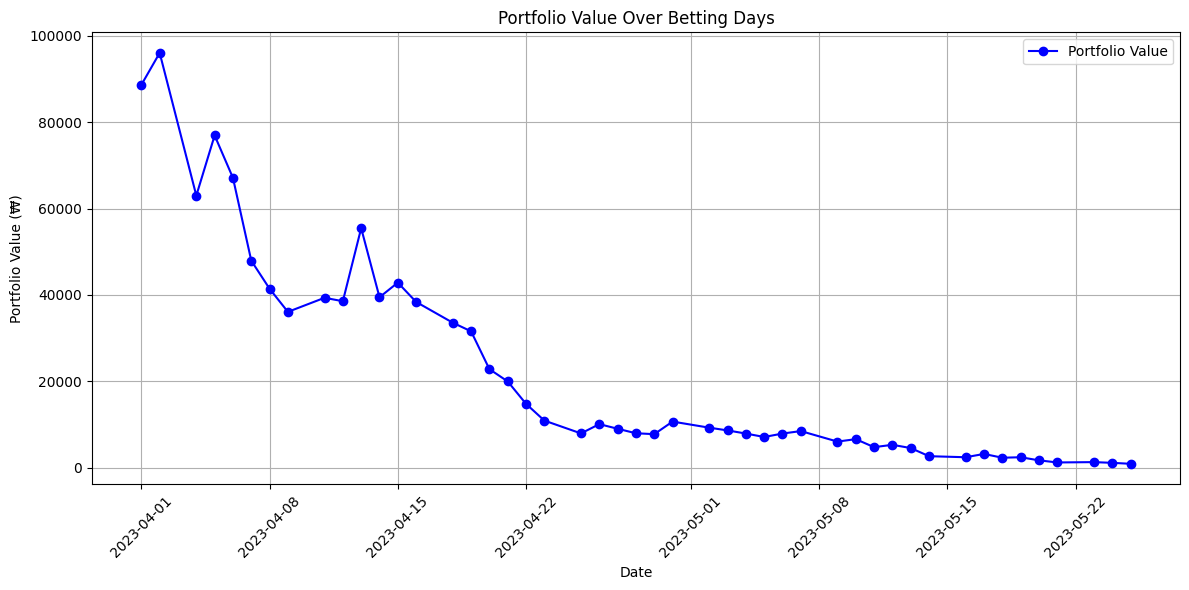

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# 파일 경로 수정
file_path = r'C:\Users\FEELab\Downloads\betman_games_수정 (1).xlsx'

# 1. 데이터 불러오기
df = pd.read_excel(file_path)

# 2. 필요한 열만 사용하고 Null 제거
df = df[['날짜', '홈', '어웨이', '홈 점수', '어웨이 점수', '홈 배당률', '어웨이 배당률']].dropna()

# 3. 날짜형으로 변환 + 정렬
df['날짜'] = pd.to_datetime(df['날짜']).dt.date
df = df.sort_values('날짜').reset_index(drop=True)

# 4. 배당률 낮은 쪽만 베팅
def choose_bet(row):
    if row['홈 배당률'] > row['어웨이 배당률']:
        return pd.Series(['홈', row['홈 배당률'], row['홈 점수'] > row['어웨이 점수']], index=['베팅팀', '배당률', '승리여부'])
    else:
        return pd.Series(['어웨이', row['어웨이 배당률'], row['어웨이 점수'] > row['홈 점수']], index=['베팅팀', '배당률', '승리여부'])

df[['베팅팀', '배당률', '승리여부']] = df.apply(choose_bet, axis=1)

# 5. 초기 자산 설정
initial_capital = 100000
capital = initial_capital
portfolio_values = [capital]  # 자산 흐름 기록 (초기 자산 포함)
dates = []                    # 베팅한 날짜 기록
daily_returns = []            # 일별 수익률 기록

# 6. 날짜별 그룹핑
grouped = df.groupby('날짜')

for date, games in grouped:
    # 자산이 1000원 이하면 베팅 중단
    if capital <= 1000:
        print(f"베팅 자산이 1,000원 이하로 떨어져 {date}부터 베팅을 중단합니다.")
        break
    
    day_profit = 0
    day_bets = 0
    
    for _, row in games.iterrows():
        # 하루 시작 시점의 자산에서 10% 베팅액 계산
        bet_amount = capital * 0.1
        
        # 자산이 베팅액보다 적으면 베팅 중단 (해당 날 더 이상 베팅 불가)
        if capital < bet_amount:
            break
        
        if row['승리여부']:
            profit = bet_amount * (row['배당률'] - 1)
        else:
            profit = -bet_amount
        
        capital += profit
        day_profit += profit
        day_bets += 1

        # 베팅 후 자산 1000원 이하면 즉시 종료
        if capital <= 1000:
            print(f"베팅 자산이 1,000원 이하로 떨어져 {date} 베팅 중 중단합니다.")
            break
    
    # 해당 날에 베팅이 있었으면 기록
    if day_bets > 0:
        dates.append(date)
        portfolio_values.append(capital)
        # daily_returns는 전일 자산 대비 오늘 수익률
        daily_returns.append(day_profit / portfolio_values[-2])

# 7. 샤프 비율 계산
returns = pd.Series(daily_returns, index=dates)
mean_return = returns.mean()
std_return = returns.std()
sharpe_ratio = mean_return / std_return if std_return != 0 else np.nan

# 8. 결과 출력
print(f"최종 자산: {capital:,.0f}원")
print(f"총 베팅 일수: {len(dates)}일")

if len(dates) > 0:
    print(f"베팅 시작일: {dates[0]}")
    print(f"베팅 종료일: {dates[-1]}")

print(f"샤프 비율: {sharpe_ratio:.4f}")

# 9. 자산 그래프 (전체 베팅 기간)
plt.figure(figsize=(12, 6))
plt.plot(dates, portfolio_values[1:], label='Portfolio Value', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (₩)')
plt.title('Portfolio Value Over Betting Days')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


베팅 자산이 1,000원 이하로 떨어져 2023-05-30 베팅 중 중단합니다.
베팅 자산이 1,000원 이하로 떨어져 2023-05-31부터 베팅을 중단합니다.
최종 자산: 997원
총 베팅 일수: 51일
베팅 시작일: 2023-04-01
베팅 종료일: 2023-05-30
샤프 비율: -0.3329


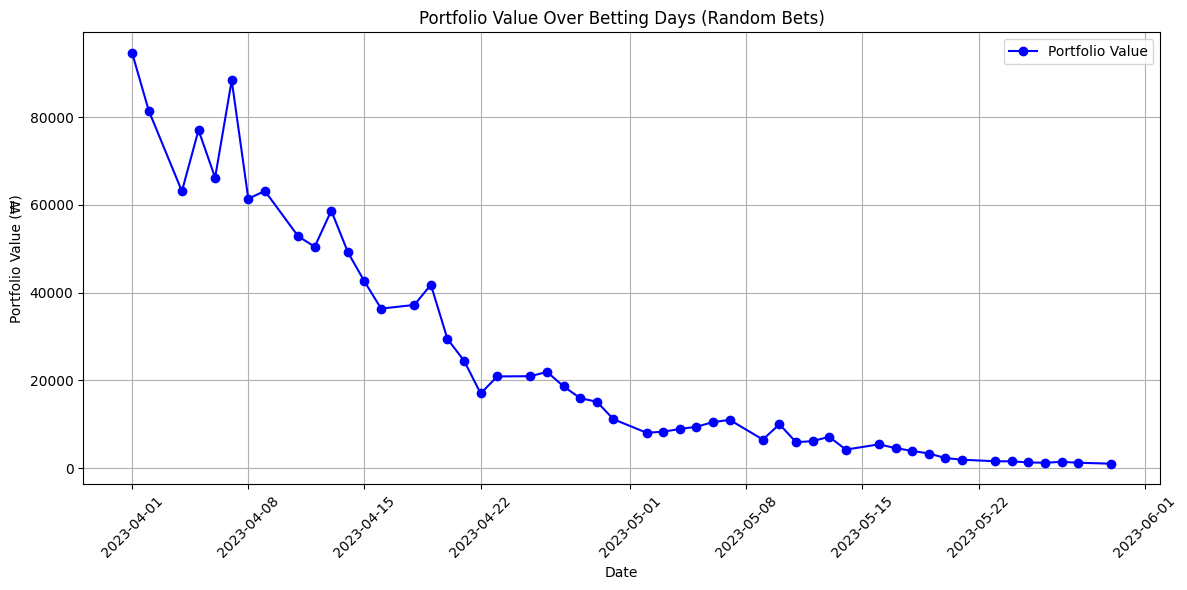

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random

# 파일 경로 수정
file_path = r'C:\Users\FEELab\Downloads\betman_games_수정 (1).xlsx'

# 1. 데이터 불러오기
df = pd.read_excel(file_path)

# 2. 필요한 열만 사용하고 Null 제거
df = df[['날짜', '홈', '어웨이', '홈 점수', '어웨이 점수', '홈 배당률', '어웨이 배당률']].dropna()

# 3. 날짜형으로 변환 + 정렬
df['날짜'] = pd.to_datetime(df['날짜']).dt.date
df = df.sort_values('날짜').reset_index(drop=True)

# 4. 기분 따라 (랜덤) 베팅: 홈팀 혹은 어웨이팀 중 무작위 선택
def random_bet(row):
    # 랜덤으로 '홈' or '어웨이' 선택
    chosen_team = random.choice(['홈', '어웨이'])
    if chosen_team == '홈':
        odds = row['홈 배당률']
        win = row['홈 점수'] > row['어웨이 점수']
    else:
        odds = row['어웨이 배당률']
        win = row['어웨이 점수'] > row['홈 점수']
    return pd.Series([chosen_team, odds, win], index=['베팅팀', '배당률', '승리여부'])

df[['베팅팀', '배당률', '승리여부']] = df.apply(random_bet, axis=1)

# 5. 초기 자산 설정
initial_capital = 100000
capital = initial_capital
portfolio_values = [capital]  # 자산 흐름 기록 (초기 자산 포함)
dates = []                    # 베팅한 날짜 기록
daily_returns = []            # 일별 수익률 기록

# 6. 날짜별 그룹핑
grouped = df.groupby('날짜')

for date, games in grouped:
    # 자산이 1000원 이하면 베팅 중단
    if capital <= 1000:
        print(f"베팅 자산이 1,000원 이하로 떨어져 {date}부터 베팅을 중단합니다.")
        break
    
    day_profit = 0
    day_bets = 0
    
    for _, row in games.iterrows():
        # 하루 시작 시점의 자산에서 10% 베팅액 계산
        bet_amount = capital * 0.1
        
        # 자산이 베팅액보다 적으면 베팅 중단 (해당 날 더 이상 베팅 불가)
        if capital < bet_amount:
            break
        
        if row['승리여부']:
            profit = bet_amount * (row['배당률'] - 1)
        else:
            profit = -bet_amount
        
        capital += profit
        day_profit += profit
        day_bets += 1

        # 베팅 후 자산 1000원 이하면 즉시 종료
        if capital <= 1000:
            print(f"베팅 자산이 1,000원 이하로 떨어져 {date} 베팅 중 중단합니다.")
            break
    
    # 해당 날에 베팅이 있었으면 기록
    if day_bets > 0:
        dates.append(date)
        portfolio_values.append(capital)
        daily_returns.append(day_profit / portfolio_values[-2])

# 7. 샤프 비율 계산
returns = pd.Series(daily_returns, index=dates)
mean_return = returns.mean()
std_return = returns.std()
sharpe_ratio = mean_return / std_return if std_return != 0 else np.nan

# 8. 결과 출력
print(f"최종 자산: {capital:,.0f}원")
print(f"총 베팅 일수: {len(dates)}일")

if len(dates) > 0:
    print(f"베팅 시작일: {dates[0]}")
    print(f"베팅 종료일: {dates[-1]}")

print(f"샤프 비율: {sharpe_ratio:.4f}")

# 9. 자산 그래프 (전체 베팅 기간)
plt.figure(figsize=(12, 6))
plt.plot(dates, portfolio_values[1:], label='Portfolio Value', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (₩)')
plt.title('Portfolio Value Over Betting Days (Random Bets)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
